In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum13ml/data/titanic_cleaned.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


<Axes: >

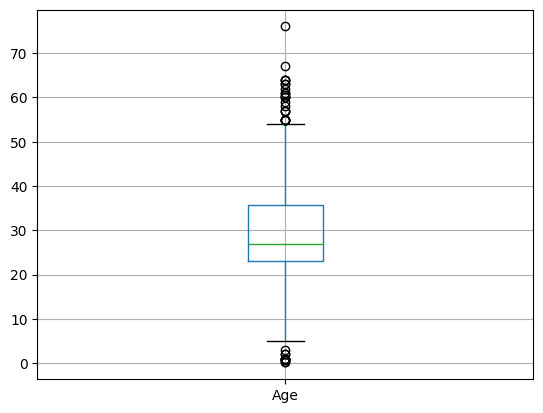

In [ ]:
df.boxplot(column='Age')

In [ ]:
df['Age' ].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-3757479325.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age' ].fillna(df['Age'].median(), inplace=True)


In [ ]:
# replacing the missing value in "Embarked" column with mode valu
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)

/tmp/ipython-input-79214058.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
replacements = {
'Sex': {'male': 0, 'female': 1},
'Embarked': {'S': 0, 'C': 1, 'Q':2}

}

df.replace(replacements, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0


In [ ]:
X = df.drop('Survived', axis=1)
y = df ['Survived' ]

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.2, random_state=42

)

In [ ]:
X_train.shape

(334, 8)

In [ ]:
X_train.shape[1]

8

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()

# Hidden layer 1
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# Dropout untuk mengurangi overfitting
model.add(Dropout(0.3))

# Hidden layer 2
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid' ))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy']

)
model. summary ()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
  monitor='val_loss',
  patience=5,
  restore_best_weights=True

)

In [ ]:
history = model.fit(
X_train,
y_train,
epochs=100,
batch_size=16,
validation_split=0.2,
callbacks=[early_stop],
verbose=1

)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6406 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6399 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6229 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6395 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6374 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5976 - loss: nan - val_accuracy: 0.6716 - val_loss: nan


In [ ]:
loss, accuracy = model. evaluate(X_test, y_test)

print("Test Loss     :", loss)
print("Test Accuracy :", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5906 - loss: nan
Test Loss     : nan
Test Accuracy : 0.5952380895614624


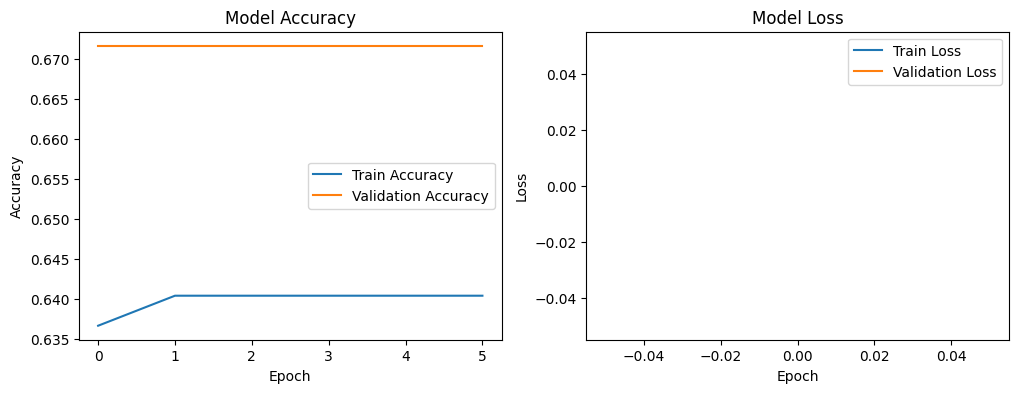

In [ ]:

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy' ], label='Train Accuracy' )
plt.plot(history.history['val_accuracy' ], label='Validation Accuracy' )
plt.title('Model Accuracy' )
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss' ], label='Train Loss' )
plt.plot(history.history['val_loss' ], label='Validation Loss' )
plt.title('Model Loss' )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()